In [1]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from scipy.interpolate import interp1d

In [2]:
#Reading data

bright = pd.read_csv('data/Brightest_stars.csv')
close = pd.read_csv('data/closest_stars.csv')
dworfs = pd.read_csv('data/dworfs.csv')
sun = pd.read_csv('data/Sun.csv')
main = pd.read_csv('data/Main sequence.csv')
giant = pd.read_csv('data/Giant.csv')
sgiant = pd.read_csv('data/Supergiant.csv')
m45 = pd.read_csv('data/M45.csv')
ngc = pd.read_csv('data/NGC188.csv')
bv = pd.read_csv('data/BV.csv')

In [3]:
#Calculations

bright['r'] = 10**((bright['m']-bright['M']+5)/5)

order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}

f = lambda s: order[s[0]]+s[1]

bright['Sp2'] = bright['Sp'].apply(f)
close['Sp2'] = close['Sp'].apply(f)
sun['Sp2'] = sun['Sp'].apply(f)
main['Sp2'] = main['Sp'].apply(f)
giant['Sp2'] = giant['Sp'].apply(f)
sgiant['Sp2'] = sgiant['Sp'].apply(f)
dworfs['Sp2'] = dworfs['Sp'].apply(f)

main_new = np.linspace(main['Sp2'].astype(np.int64).min(), main['Sp2'].astype(np.int64).max(), 1)
f = interp1d(main['Sp2'].astype(np.int64), main['M'].astype(np.int64), kind='quadratic')
main_smooth=f(main_new)

giant_new = np.linspace(giant['Sp2'].astype(np.int64).min(), giant['Sp2'].astype(np.int64).max(), 1)
f = interp1d(giant['Sp2'].astype(np.int64), giant['M'].astype(np.int64), kind='quadratic')
giant_smooth=f(giant_new)

sgiant_new = np.linspace(sgiant['Sp2'].astype(np.int64).min(), sgiant['Sp2'].astype(np.int64).max(), 1)
f = interp1d(sgiant['Sp2'].astype(np.int64), sgiant['M'].astype(np.int64), kind='quadratic')
sgiant_smooth=f(sgiant_new)

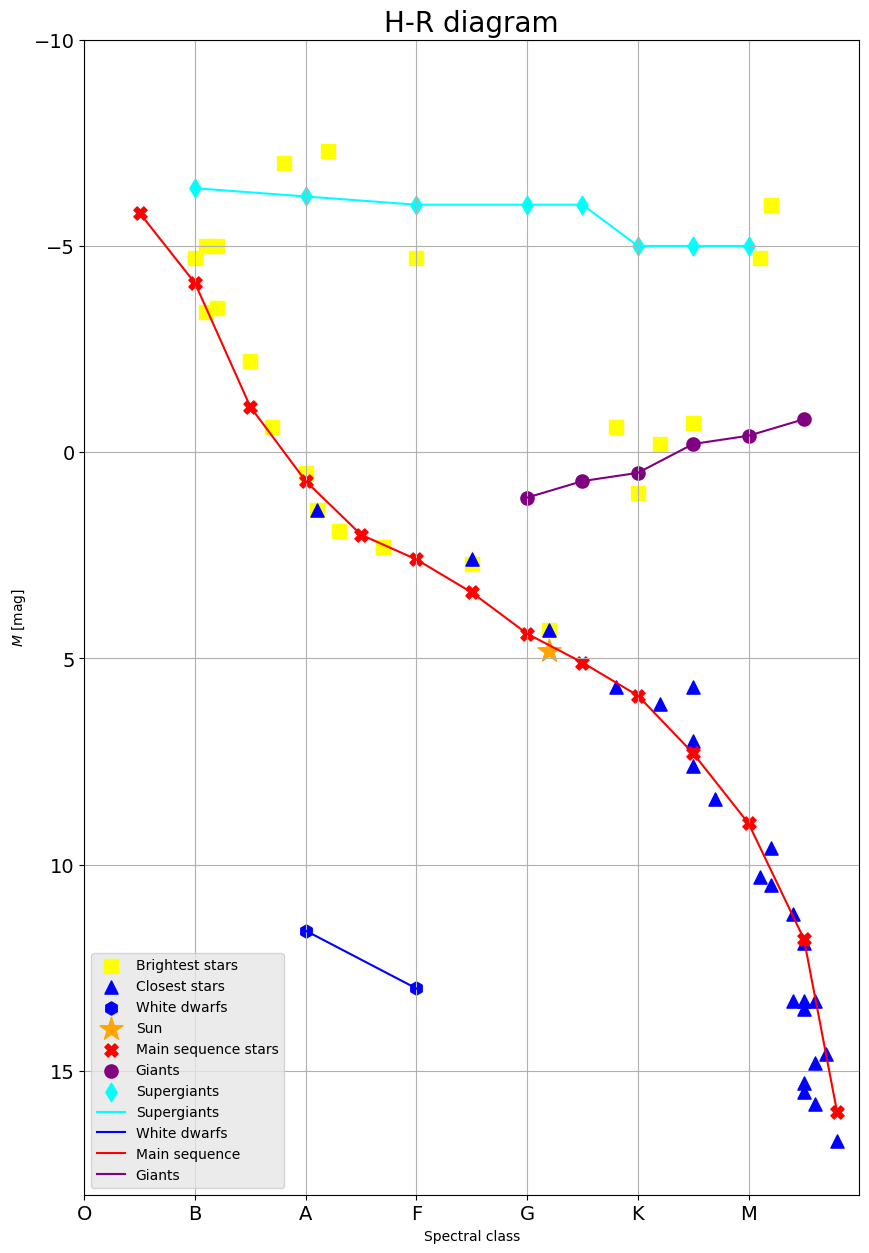

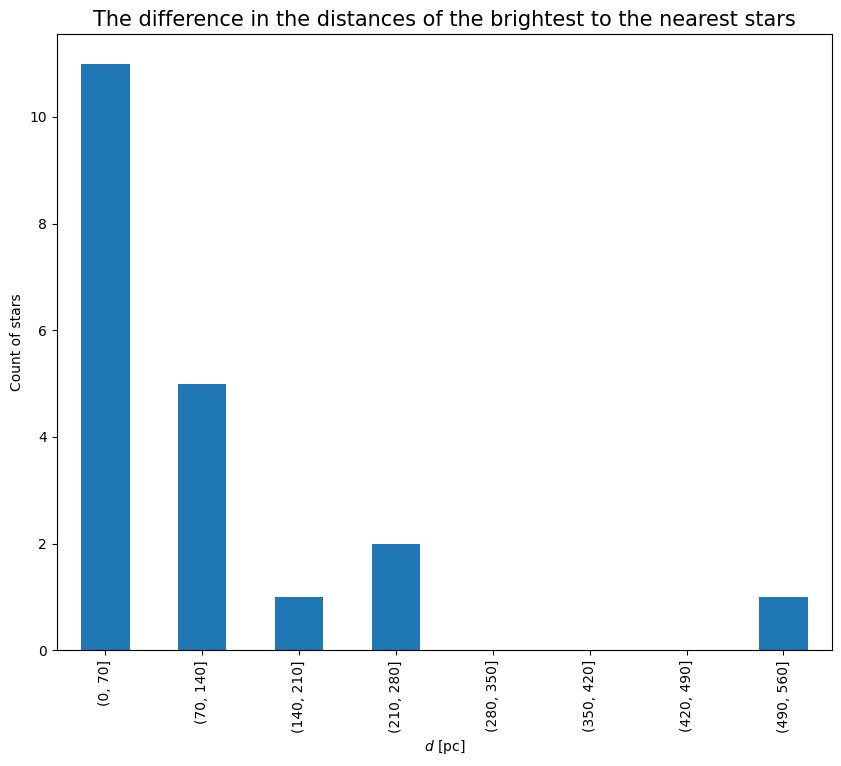

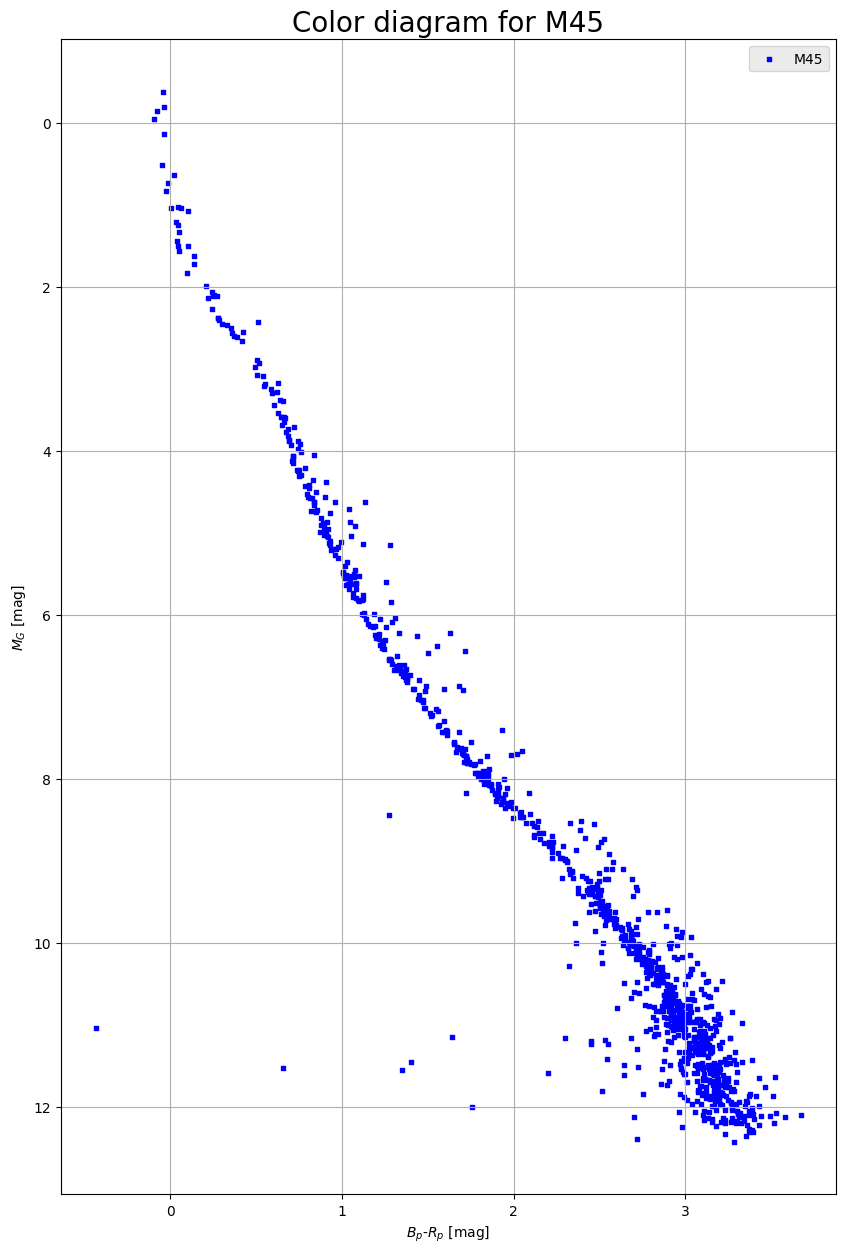

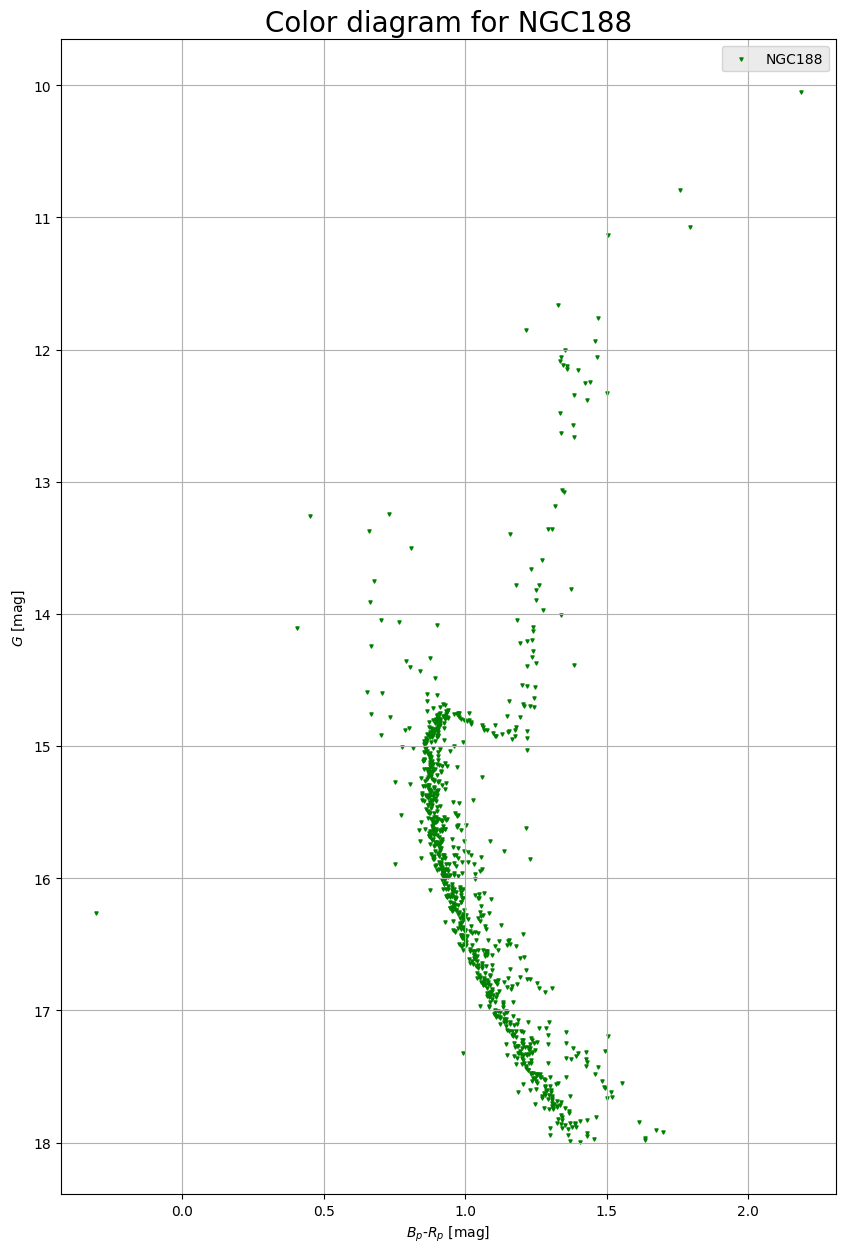

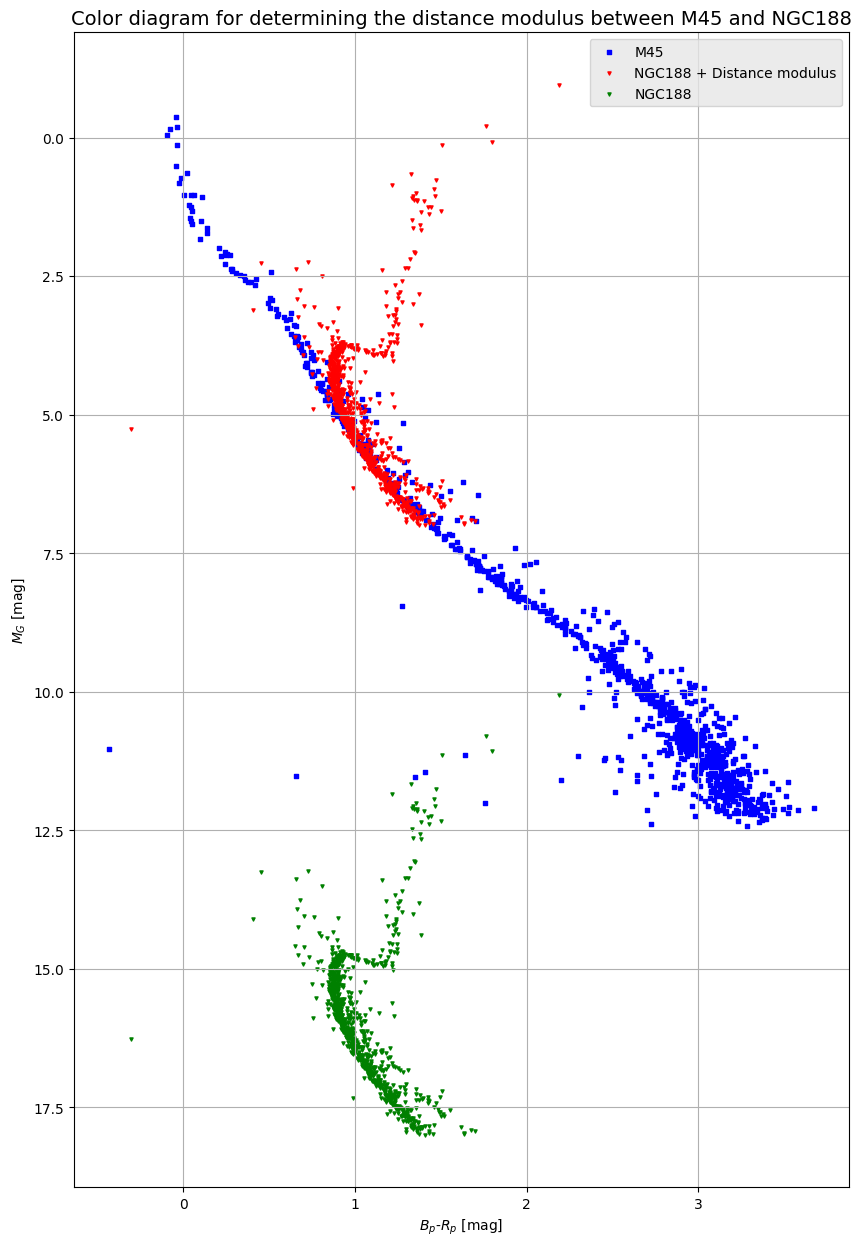

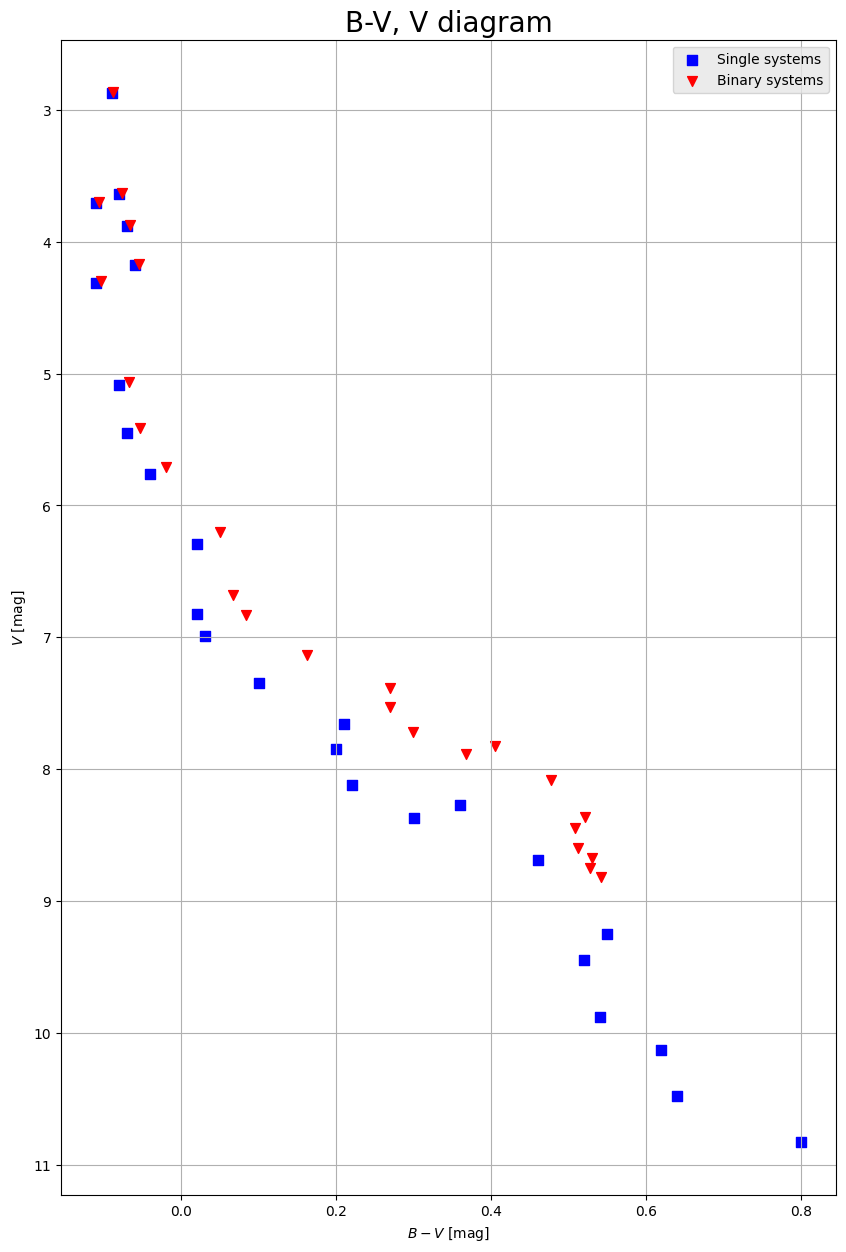

In [4]:
#Plotting and additional caltuations

fig, ax = plt.subplots(figsize=(10,15))

ax.set_xlim(0, 70)
ax.set_ylim(18, -10)
ax.grid()
ax.set_title('H-R diagram')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral class')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$M$ [mag]')
ax.yaxis.label.set_fontsize(10)

ax.scatter(bright['Sp2'].astype(np.int64), bright['M'],
           s=90, c='yellow', marker="s", label='Brightest stars')

ax.scatter(close['Sp2'].astype(np.int64), close['M'],
           s=90, c='blue', marker="^", label='Closest stars')

ax.scatter(dworfs['Sp2'].astype(np.int64), dworfs['M'],
           s=90, c='blue', marker="h", label='White dwarfs')

ax.scatter(sun['Sp2'].astype(np.int64), sun['M'],
           s=300, c='orange', marker="*", label='Sun')

ax.scatter(main['Sp2'].astype(np.int64), main['M'],
           s=90, c='red', marker="X", label='Main sequence stars')

ax.scatter(giant['Sp2'].astype(np.int64), giant['M'],
           s=90, c='purple', marker="o", label='Giants')


ax.scatter(sgiant['Sp2'].astype(np.int64), sgiant['M'],
           s=90, c='cyan', marker="d", label='Supergiants')

ax.plot (sgiant['Sp2'].astype(np.int64), sgiant['M'], color='cyan', label='Supergiants')
ax.plot (dworfs['Sp2'].astype(np.int64), dworfs['M'], color='blue', label='White dwarfs')
ax.plot (main['Sp2'].astype(np.int64), main['M'], color='red', label='Main sequence')
ax.plot (giant['Sp2'].astype(np.int64), giant['M'], color='purple', label='Giants')

ax.set_xticks(range(0,70,10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)

ax.tick_params(axis='both', labelsize=14)
legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/HR.png', bbox_inches='tight') 

bright['delta'] = bright['r'] - 1/0.3

fig, ax = plt.subplots(figsize=(10,8))

(
    pd.cut(bright['delta'], bins=np.arange(0, 600, 70))
        .value_counts()
        .sort_index()
        .plot.bar(ax=ax)
)

ax.set_title('The difference in the distances of the brightest to the nearest stars')

ax.title.set_fontsize(15)
ax.set_xlabel('$d$ [pc]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('Count of stars')
ax.yaxis.label.set_fontsize(10)

ax.tick_params(axis='both', labelsize=10)


plt.show() 
fig.savefig('plots/Delta.png', bbox_inches='tight') 

m45['Plx_as'] = m45['Plx'] * 10**-3
m45['d'] = 1 / m45['Plx_as']
m45['M'] = 5 + m45['Gmag'] - 5 * np.log10(m45['d'])

fig, ax = plt.subplots(figsize=(10,15))

ax.grid()
ax.set_title('Color diagram for M45')

ax.title.set_fontsize(20)
ax.set_xlabel('$B_p$-$R_p$ [mag]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$M_G$ [mag]')
ax.yaxis.label.set_fontsize(10)
ax.invert_yaxis()

ax.scatter(m45['BP-RP'], m45['M'],
           s=5, c='blue', marker="s", label='M45')

legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/HR_m45.png', bbox_inches='tight') 

fig, ax = plt.subplots(figsize=(10,15))

ax.grid()
ax.set_title('Color diagram for NGC188')

ax.title.set_fontsize(20)
ax.set_xlabel('$B_p$-$R_p$ [mag]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$G$ [mag]')
ax.yaxis.label.set_fontsize(10)
ax.invert_yaxis()

ax.scatter(ngc['BP-RP'], ngc['Gmag'],
           s=5, c='green', marker="v", label='NGC188')

legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/HR_ngc.png', bbox_inches='tight') 

fig, ax = plt.subplots(figsize=(10,15))

ax.grid()
ax.set_title('Color diagram for determining the distance modulus between M45 and NGC188')

ax.title.set_fontsize(14)
ax.set_xlabel('$B_p$-$R_p$ [mag]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$M_G$ [mag]')
ax.yaxis.label.set_fontsize(10)
ax.invert_yaxis()

ax.scatter(m45['BP-RP'], m45['M'],
           s=5, c='blue', marker="s", label='M45')

ax.scatter(ngc['BP-RP'], ngc['Gmag'] - 11,
           s=5, c='red', marker="v", label='NGC188 + Distance modulus')

ax.scatter(ngc['BP-RP'], ngc['Gmag'],
           s=5, c='green', marker="v", label='NGC188')


legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/HR_both.png', bbox_inches='tight')

average_m45 = np.sum(m45['d'])/1045 

bv['B-V'] = bv['B'] - bv['V']

bv['M_b'] = bv['B'] - 5 * (np.log10(average_m45) -1)
bv['M_v'] = bv['V'] - 5 * (np.log10(average_m45) -1)

M_b2 = 9.5 - 5 * (np.log10(average_m45) -1)
M_v2 = 9 - 5 * (np.log10(average_m45) -1)

bv['B_total'] =  -2.5 * np.log10(10**(-0.4*bv['B'])+10**(-0.4*9.5)) 
bv['V_total']= -2.5 * np.log10(10**(-0.4*bv['V'])+10**(-0.4*9))

bv['B-V_total'] = bv['B_total'] - bv['V_total']

fig, ax = plt.subplots(figsize=(10,15))

ax.grid()
ax.set_title('B-V, V diagram')

ax.title.set_fontsize(20)
ax.set_xlabel('$B-V$ [mag]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$V$ [mag]')
ax.yaxis.label.set_fontsize(10)
ax.invert_yaxis()

ax.scatter(bv['B-V'], bv['V'],
           s=50, c='blue', marker="s", label='Single systems')

ax.scatter(bv['B-V_total'], bv['V_total'],
           s=50, c='red', marker="v", label='Binary systems')


legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/B-V_V.png', bbox_inches='tight') 